In [1]:
import numpy as np

In [2]:
import os
data_path = './fake_data'
files = os.listdir(data_path)
files.sort()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

xy = []
total_data = pd.DataFrame()
for file in files:
    try:
        data = pd.read_csv(os.path.join(data_path, file))
        total_data = pd.concat([total_data, data], ignore_index=True)
        xy.append((data['steerCommand'], data['targetLateralAcceleration']))
    except:
        print(f"Error reading file {file}")
        continue
    
needed_features = ['vEgo', 'aEgo', 'roll', 'targetLateralAcceleration', 'steerCommand']

Error reading file cleaned
Error reading file data_1724706448.6504612.csv
Error reading file data_1724706453.153287.csv
Error reading file data_1724706488.47952.csv
Error reading file data_1724706492.1061223.csv
Error reading file data_1724706503.1983807.csv
Error reading file data_1724706509.248979.csv
Error reading file data_1724706509.4220204.csv
Error reading file data_1724706517.144911.csv
Error reading file data_1724706529.1025753.csv
Error reading file data_1724706568.3558981.csv
Error reading file data_1724706583.5566442.csv
Error reading file data_1724706586.5305703.csv
Error reading file data_1724706593.7380583.csv
Error reading file data_1724706594.9483638.csv
Error reading file data_1724706595.7510633.csv
Error reading file data_1724706619.2162788.csv
Error reading file data_1724706621.0597029.csv
Error reading file data_1724706621.1638875.csv
Error reading file data_1724706622.0708237.csv
Error reading file data_1724706623.5636292.csv
Error reading file data_1724706626.511

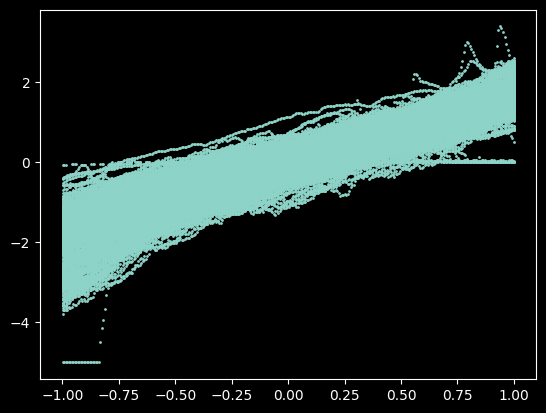

In [15]:
plt.scatter(total_data['steerCommand'][:100000], total_data['targetLateralAcceleration'][:100000], s=1)

In [10]:
# drop all rows with NaN values
def preprocess_data(data, scaler=None, needed_features=None):
    data = data.dropna()
    data = data[data['vEgo'] > 0]
    data = data[data['steerCommand'] >= -1]
    data = data[data['steerCommand'] <= 1]
    data = data[needed_features]
    if scaler:
        data = scaler.transform(data)
    return data


In [11]:
total_data = preprocess_data(total_data, needed_features=needed_features)


In [16]:
total_data.head()


,vEgo,aEgo,roll,targetLateralAcceleration,steerCommand
150,18.678622,0.094582,0.209039,-1.461388,-0.998331
151,18.695685,0.167345,0.212705,-1.480938,-0.991653
152,18.705574,0.163662,0.219507,-1.461388,-0.984975
153,18.707738,0.109117,0.232179,-1.422287,-0.978297
154,18.713778,0.076642,0.244851,-1.383187,-0.971619


In [17]:
# feature scaling using the first 1000 points
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(total_data)
# transform data
total_data = scaler.transform(total_data)

In [18]:
import pickle

# save scaler values
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [19]:
total_data

array([[0.43655939, 0.70572858, 0.56606851, 0.39562842, 0.        ],
       [0.43695817, 0.70969217, 0.56722219, 0.39344262, 0.00334448],
       [0.43718932, 0.70949156, 0.56936264, 0.39562842, 0.00668896],
       ...,
       [0.74518281, 0.70128976, 0.54748263, 0.73770492, 0.99331104],
       [0.74500981, 0.69913827, 0.54834606, 0.73333333, 0.99665552],
       [0.74518414, 0.70213827, 0.54942642, 0.73770492, 1.        ]])

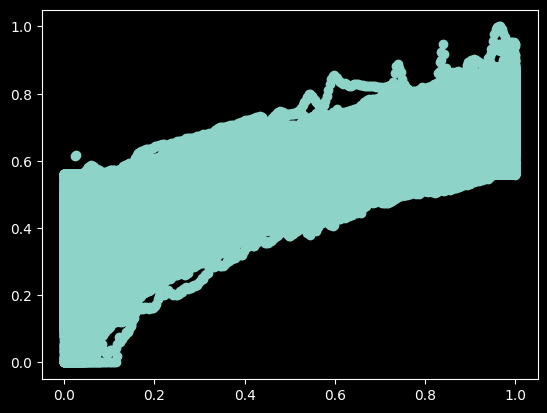

In [20]:
plt.scatter(total_data[:, -1], total_data[:, -2])

In [21]:
# now clean all the data
cleaned_path = './fake_data/cleaned'
pickle.dump(total_data, open(os.path.join(cleaned_path, 'data.pkl'), 'wb'))